<a href="https://colab.research.google.com/github/Esteban-Caldera/Programaci-n-Avanzada/blob/main/U2A3%20An%C3%A1lisis%20de%20Datos%20Aplicables%20al%20Teorema%20de%20Na%C3%AFve%20Bayes/NAYBE_BAYES_BANCO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Dataset
los datos representan los detalles de 5000 clientes de una banco con un ID unico,edad,experiencia,ingreso, gasto cred y creditcard entre otros datos. Con esta informacion se pretende evaluar al cliente para asi saber si es apto o no para la aceptacion de un prestamo personal.
> target= Prestamo personal

> Features = ID,Age, Ingreso, gasto cred, CD count
Extraido de: https://www.kaggle.com/datasets/krantiswalke/bank-personal-loan-modelling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import itertools

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [3]:
data=pd.read_csv('Bank_Personal_Loan_ModellingA.csv')
print(f"data.shape: {data.shape}")
data.head()

data.shape: (5000, 12)


,ID,Age,Experience,Ingreso,Family,gasto cred,Education,hipoteca,Credit,CD Account,cuenta online,prestamopersonal
0,1,25,1,49,4,1.6,1,0,0,0,0,0
1,2,45,19,34,3,1.5,1,0,0,0,0,0
2,3,39,15,11,1,1.0,1,0,0,0,0,0
3,4,35,9,100,1,2.7,2,0,0,0,0,0
4,5,35,8,45,4,1.0,2,0,1,0,0,0


## 2. Vizualizacion de dataset

In [4]:
df = pd.DataFrame(data)
df

,ID,Age,Experience,Ingreso,Family,gasto cred,Education,hipoteca,Credit,CD Account,cuenta online,prestamopersonal
0,1,25,1,49,4,1.6,1,0,0,0,0,0
1,2,45,19,34,3,1.5,1,0,0,0,0,0
2,3,39,15,11,1,1.0,1,0,0,0,0,0
3,4,35,9,100,1,2.7,2,0,0,0,0,0
4,5,35,8,45,4,1.0,2,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,1,1.9,3,0,0,0,1,0
4996,4997,30,4,15,4,0.4,1,85,0,0,1,0
4997,4998,63,39,24,2,0.3,3,0,0,0,0,0
4998,4999,65,40,49,3,0.5,2,0,0,0,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                5000 non-null   int64  
 1   Age               5000 non-null   int64  
 2   Experience        5000 non-null   int64  
 3   Ingreso           5000 non-null   int64  
 4   Family            5000 non-null   int64  
 5   gasto cred        5000 non-null   float64
 6   Education         5000 non-null   int64  
 7   hipoteca          5000 non-null   int64  
 8   Credit            5000 non-null   int64  
 9   CD Account        5000 non-null   int64  
 10  cuenta online     5000 non-null   int64  
 11  prestamopersonal  5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


In [6]:
df.isnull().sum().to_frame('Nan value')

,Nan value
ID,0
Age,0
Experience,0
Ingreso,0
Family,0
gasto cred,0
Education,0
hipoteca,0
Credit,0
CD Account,0


In [7]:
for col in df:
  print(f"{col}: {df[col].nunique()}")

ID: 5000
Age: 45
Experience: 47
Ingreso: 162
Family: 4
gasto cred: 108
Education: 3
hipoteca: 347
Credit: 2
CD Account: 2
cuenta online: 2
prestamopersonal: 2


In [8]:
df.describe(include= [np.number]).T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Ingreso,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
gasto cred,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
hipoteca,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Credit,5000.0,0.294000,0.455637,0.0,0.00,0.0,1.00,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.00,0.0,0.00,1.0


In [9]:
# Describe only object columns, but provide a fallback if none exist
object_columns = df.select_dtypes(include=['object']).columns
if len(object_columns) > 0:
    description = df.describe(include=['object']).T
    display(description)  # Or print(description)
else:
    print("No object columns found in the DataFrame.")

No object columns found in the DataFrame.


De acuerdo a las tablas

In [10]:
df.drop('ID', axis=1, inplace=True)
df

,Age,Experience,Ingreso,Family,gasto cred,Education,hipoteca,Credit,CD Account,cuenta online,prestamopersonal
0,25,1,49,4,1.6,1,0,0,0,0,0
1,45,19,34,3,1.5,1,0,0,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,1,0


## 4. Analisis exploratorio de datos (EDA)

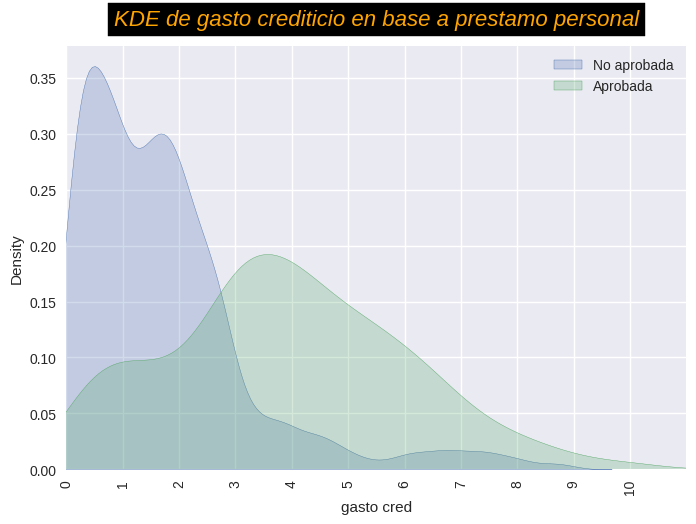

In [11]:
# Revisar la destribucion del salario estimado basado en compras
import warnings
warnings.filterwarnings("ignore", category = FutureWarning)

font = {'fontsize':16, 'fontstyle':'italic', 'backgroundcolor':'black', 'color':'orange'}
%matplotlib inline
plt.style.use('seaborn-v0_8')
sns.kdeplot(df.loc[df['prestamopersonal']==0, 'gasto cred'], label='No aprobada', fill=True)
sns.kdeplot(df.loc[df['prestamopersonal']==1, 'gasto cred'], label='Aprobada', fill=True)
plt.title('KDE de gasto crediticio en base a prestamo personal', fontdict=font, pad=15)
plt.xticks(np.arange(0,11,1),rotation=90)
plt.xlim([0,11])
plt.legend()
plt.show()

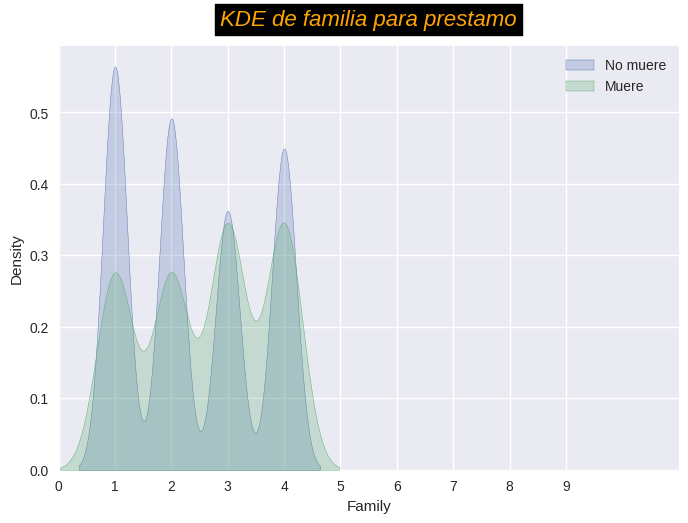

In [12]:
# Revisar la destribucion del salario estimado basado en compras
import warnings
warnings.filterwarnings("ignore", category = FutureWarning)

font = {'fontsize':16, 'fontstyle':'italic', 'backgroundcolor':'black', 'color':'orange'}
%matplotlib inline
plt.style.use('seaborn-v0_8')
sns.kdeplot(df.loc[df['prestamopersonal']==0, 'Family'], label='No muere', fill=True)
sns.kdeplot(df.loc[df['prestamopersonal']==1, 'Family'], label='Muere', fill=True)
plt.title('KDE de familia para prestamo', fontdict=font, pad=15)
plt.xticks(np.arange(0,10,1))
plt.xlim([0,11])
plt.legend()
plt.show()

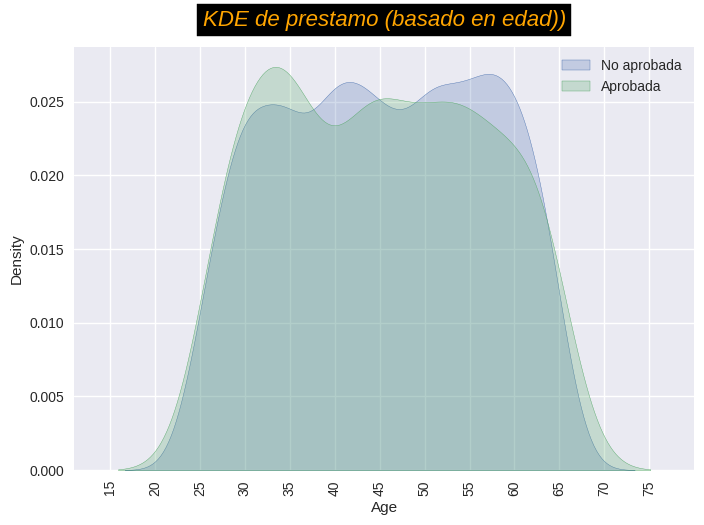

In [13]:
%matplotlib inline
#plt.style.use('seaborn-v0_8')
sns.kdeplot(df.loc[df['prestamopersonal']==0, 'Age'], label='No aprobada', fill=True)
sns.kdeplot(df.loc[df['prestamopersonal']==1, 'Age'], label='Aprobada', fill=True)
plt.title('KDE de prestamo (basado en edad))', fontdict=font, pad=15)
plt.xticks(np.arange(0,80,5), rotation=90)
plt.xlim([11,80])
plt.legend()
plt.show()

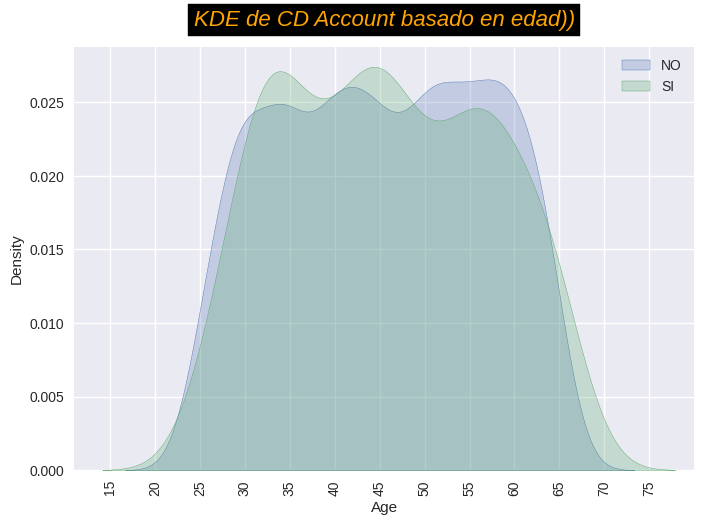

In [14]:
# check distribution of age (based on gender)
%matplotlib inline
#plt.style.use('seaborn-v0_8')
sns.kdeplot(df.loc[df['CD Account']==0, 'Age'], label='NO', fill=True)
sns.kdeplot(df.loc[df['CD Account']==1, 'Age'], label='SI', fill=True)
plt.title('KDE de CD Account basado en edad))', fontdict=font, pad=15)
plt.xticks(np.arange(0,80,5), rotation=90)
plt.xlim([11,80])
plt.legend()
plt.show()

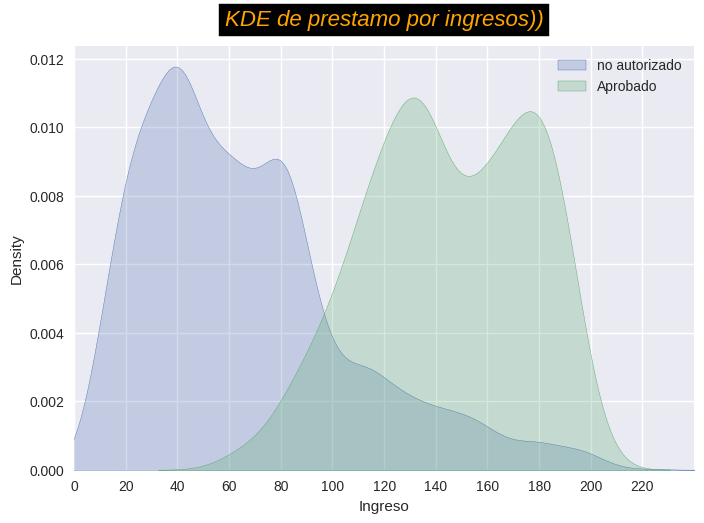

In [15]:
# check distribution of age (based on gender)
%matplotlib inline
#plt.style.use('seaborn-v0_8')
sns.kdeplot(df.loc[df['prestamopersonal']==0, 'Ingreso'], label='no autorizado', fill=True)
sns.kdeplot(df.loc[df['prestamopersonal']==1, 'Ingreso'], label='Aprobado', fill=True)
plt.title('KDE de prestamo por ingresos))', fontdict=font, pad=15)
plt.xticks(np.arange(0,240,20))
plt.xlim([0,240])
plt.legend()
plt.show()

De acuerdo a los kde anteriores


*   Los aprobados tienen ingresos de entre 40 a 220 esto en miles de pesos.
*   La edad no importa tanto ya que los creditos son aceptados de 20 años a 75 años.
* No importa tanto el numero de integrantes por familia para el aprobamiento del credito.
* Entre mayor sea el gasto crediticio es mas seguro que el prestamo sea aprobado.



## 4.1 Analisis univariable

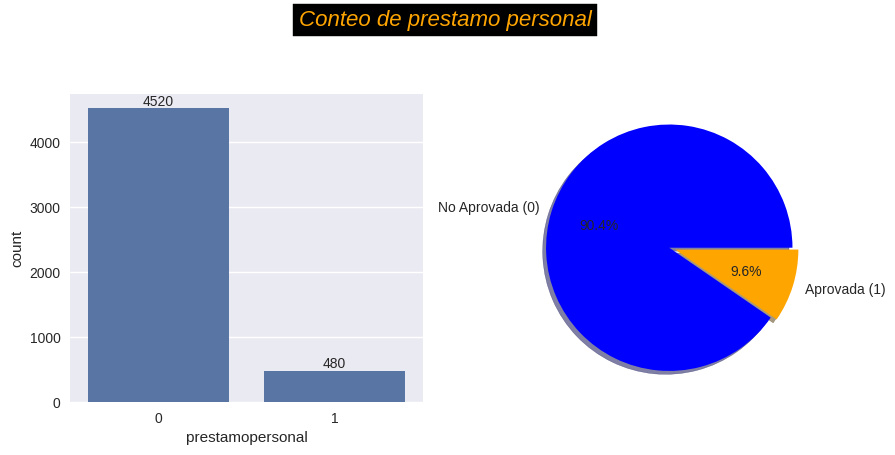

In [16]:
%matplotlib inline
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.countplot(data = df, x= 'prestamopersonal', ax=axes[0])
for container in axes[0].containers:
    axes[0].bar_label(container)

slices = df.prestamopersonal.value_counts()
activities = ['No Aprovada (0)', 'Aprovada (1)']
axes[1].pie(slices, labels=activities, colors=['blue', 'orange'], shadow=True, explode =[0,0.05], autopct='%1.1f%%')

plt.suptitle('Conteo de prestamo personal', y=1.09, **font)
plt.show()

## 4.2 Analisis **bivariable**

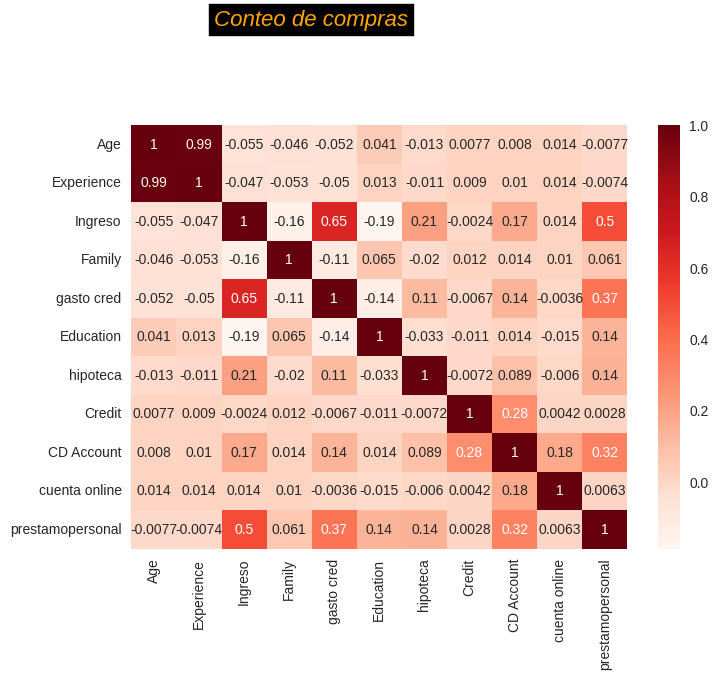

In [17]:
# Select only numerical features for correlation analysis
numerical_df = df.select_dtypes(include=np.number)

# Calculate and plot the correlation matrix
sns.heatmap(numerical_df.corr(), cmap='Reds', annot=True)
plt.suptitle('Conteo de compras', y=1.09, x=0.35, **font)
plt.show()

## 4.3 Analisis multivaribale

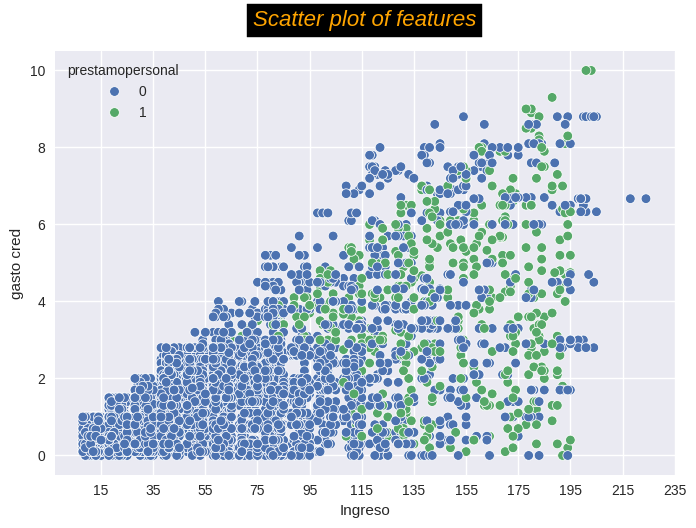

In [18]:
%matplotlib inline
# check feature correlation
sns.scatterplot(data=df,x='Ingreso', y='gasto cred', hue='prestamopersonal',)
plt.title('Scatter plot of features', y=1.04, fontdict=font)
plt.xticks(np.arange(15,250,20))
plt.show()

In [19]:
import plotly.express as px
import plotly.io as pio

# Configura el renderizador predeterminado de Plotly para Colab
pio.renderers.default = 'colab'

# Crea la figura 3D
fig = px.scatter_3d(
    data_frame=df,
    x='Ingreso',
    y='gasto cred',
    z='CD Account',
    color='prestamopersonal',
    template='ggplot2',
    opacity=0.6,
    height=700,
    title='3d scatter based on Age, EstimatedSalary, Gender and Purchased'
)

# Muestra la figura
fig.show()

In [20]:
results = pd.pivot_table(data=df, index='prestamopersonal', columns='CD Account', values='gasto cred', fill_value=0)
results.style.background_gradient(cmap='summer_r')

CD Account,0,1
prestamopersonal,,
0,1.723153,1.886543
1,3.855118,4.027357


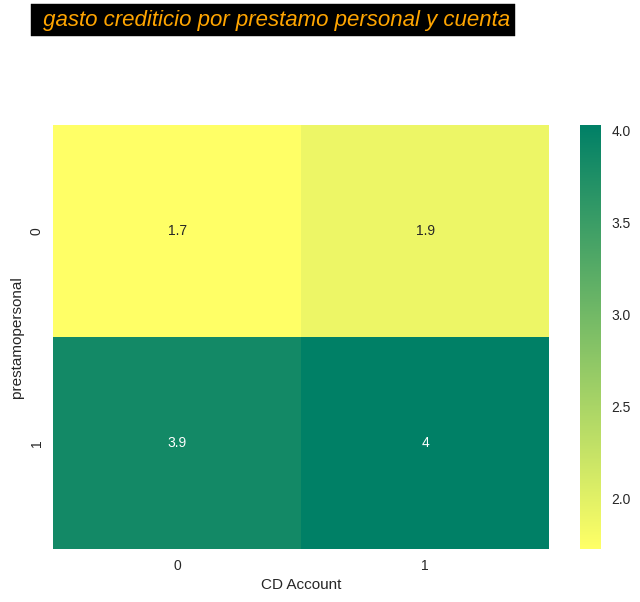

In [21]:
sns.heatmap( results, cmap='summer_r', annot=True)
plt.suptitle(' gasto crediticio por prestamo personal y cuenta', y=1.09, x=0.4, **font)
plt.show()

In [22]:
results = pd.pivot_table(data=df, index='prestamopersonal', columns='CD Account', values='Ingreso')
results.style.background_gradient(cmap='summer_r') # Apply style directly to the results

CD Account,0,1
prestamopersonal,,
0,66.211794,66.925926
1,143.335294,148.171429


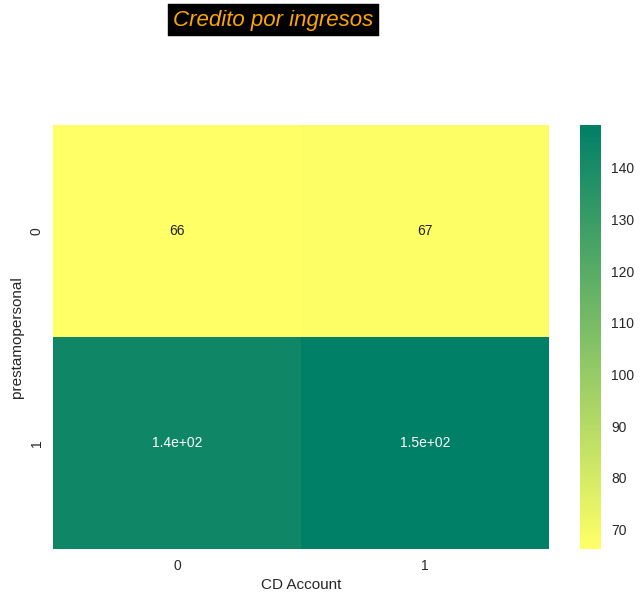

In [23]:
sns.heatmap(results, cmap='summer_r', annot=True)
plt.suptitle('Credito por ingresos', y=1.09, x=0.4, **font)
plt.show()

## 5. Modelo

In [24]:
# Our dataset we use for modeling
df

,Age,Experience,Ingreso,Family,gasto cred,Education,hipoteca,Credit,CD Account,cuenta online,prestamopersonal
0,25,1,49,4,1.6,1,0,0,0,0,0
1,45,19,34,3,1.5,1,0,0,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,1,0


In [25]:
# prompt: Definir df2 por que me marca error en la celda de abajo

df2 = df.copy()


In [26]:
# define x (features) and y (target)
x = np.asanyarray(df2.drop('prestamopersonal', axis=1))
y = df2['prestamopersonal'].values.reshape(-1,1)

In [27]:
FPR1 = []
TPR1 = []
FPR0 = []
TPR0 = []
ACC_test = []
ACC_train = []
Recall = []
Precision = []
F1 = []

def plot_confusion_matrix2(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function plots the confusion matrix.
        cm(array): confusion matrix
        classes(dictionary): classes in our target
    """
    plt.figure(figsize=(10,7))
    plt.grid(False)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt ='d'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")


    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.tight_layout()
    plt.show()

# --------------------------------------------------------------------------------------

def Perform_cross_val(model, k, x, y, scoring):
    """
    perform cross validation
        model: logistic model
        k(scaler): the value for n_splits in KFold()
        x(DataFrame or array):  x_train
        y(DataFrame or array): y_train
        scoring(string): an approach for evaluation in cross validation
    """

    kf = KFold(n_splits=k)
    cv_results = cross_val_score(model, x, y, cv=kf, scoring=scoring)
    cv_mean = np.mean(cv_results)
    print('-'*20, f"CV for k={k}, scoring={scoring}", '-'*20)
    print(f"CV mean: {cv_mean}")
    print(f"CV results: {cv_results}\n")

# --------------------------------------------------------------------------------------

def find_fold_index(k, x):
    """
    Find fold index in kfold
        k(scaler): the value used for n_splits in KFold()
        x(DataFrame or array): x_train
    """

    my_fold_index = []
    j=1
    for _ , test in KFold(k).split(x):

        my_fold_index = []
        for i in test:
            my_fold_index.append(i)
        print(f"fold {j}: [{my_fold_index[0]},{my_fold_index[-1]}]")
        print(20*'-')
        j += 1

# --------------------------------------------------------------------------------------

def plot_results(FPR0, TPR0, FPR1, TPR1, ACC_test, ACC_train, Recall, Precision, F1):
    """
    draw ROC curve and plot of Recall, precision, f1 score etc.
        FPR0(list): list of False Positive Rate for class 0
        TPR0(list): list of True Positive Rate for class 0
        FPR1(list): list of Flase Positive Rate for class 1
        TPR1(list): list of True Positive Rate for class 1
        ACC(list): list of accuracy of models
        Recall(list): list of recall score of models
        Precision(list): list of Precision score of models
        F1(list): list of F1 score of models
    """
    fig, ax = plt.subplots(1,2,figsize=(10,4))
    # plot model evaluation
    ax[0].set_title('Model Evaluation Results', fontdict=font, y=1.02)
    sns.lineplot(data=pd.DataFrame({'accoracy': ACC_test, 'Recall': Recall,
                                    'Precision': Precision, 'F1 score': F1}),
                                    markers=True, ax=ax[0])
    ax[0].set_xlabel('M')
    ax[0].set_ylabel('Evaluation')
    ax[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.12),
          fancybox=True, shadow=True)

    # plot model evaluation
    ax[1].set_title('Model Accuracy Results for train and test', fontdict=font, y=1.02)
    sns.lineplot(data=pd.DataFrame({'test accuracy': ACC_test, 'train accuracy': ACC_train}),
                                    markers=True, ax=ax[1])
    ax[1].set_xlabel('M')
    ax[1].set_ylabel('Accuracy')
    ax[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.12),
          fancybox=True, shadow=True)
    plt.show()

    # plot ROC curve for class 1
    fig, ax = plt.subplots(1,2,figsize=(10,4))
    i=1
    ax[0].set_title('ROC Curve of Class 1', fontdict=font, y=1.02)
    for fpr , tpr in zip(FPR1, TPR1):
        ax[0].plot(fpr, tpr, label=f"ROC curve of model{i} (AUC = {round(metrics.auc(fpr, tpr),3)})")
        i += 1
        ax[0].set_xlabel('FPR')
        ax[0].set_ylabel('TPR')
    ax[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.12),
          fancybox=True, shadow=True)

    # plot ROC curve for class zero
    i=1
    ax[1].set_title('ROC Curve of Class 0', fontdict=font, y=1.02)
    for fpr , tpr in zip(FPR0, TPR0):
        ax[1].plot(fpr, tpr, '--', label=f"ROC curve of model{i} (AUC = {round(metrics.auc(fpr, tpr),3)})")
        i += 1
        ax[1].set_xlabel('FPR')
        ax[1].set_ylabel('TPR')
    ax[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.12),
        fancybox=True, shadow=True)

    plt.show()

# --------------------------------------------------------------------------------------

def modeling(x, y, test_size, classes, is_add=1 ):

    # split data to train and test
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=0)
    print(20*'-', 'Shape', 20*'-')
    print(f"x_train: {x_train.shape}")
    print(f"y_train: {y_train.shape}")
    print(f"x_test: {x_test.shape}")
    print(f"y_test: {y_test.shape}")



    # define model and fit model
    clf = MultinomialNB()
    clf.fit(x_train, y_train.ravel())

    # prediction and results
    y_pred_train = clf.predict(x_train)
    y_pred_test = clf.predict(x_test)
    y_proba_train = clf.predict_proba(x_train)
    y_proba_test = clf.predict_proba(x_test)

    cm = metrics.confusion_matrix(y_test, y_pred_test)
    fpr1, tpr1, _ = metrics.roc_curve(y_test, y_proba_test[:,1])
    fpr0, tpr0, _ = metrics.roc_curve(y_test, y_proba_test[:,0])
    acc_test = metrics.accuracy_score(y_test, y_pred_test)
    acc_train = metrics.accuracy_score(y_train, y_pred_train)
    rec = metrics.recall_score(y_test, y_pred_test)
    pre = metrics.precision_score(y_test, y_pred_test)
    f1 = metrics.f1_score(y_test, y_pred_test)

    # append results
    if is_add == 1:
        FPR0.append(fpr0)
        TPR0.append(tpr0)
        FPR1.append(fpr1)
        TPR1.append(tpr1)
        ACC_test.append(acc_test)
        ACC_train.append(acc_train)
        Recall.append(rec)
        Precision.append(pre)
        F1.append(f1)

    plot_results(FPR0, TPR0, FPR1, TPR1, ACC_test, ACC_train, Recall, Precision, F1)

    # Evaluation model
    print('-'*20 , 'Confusion Matrix', '-'*20)
    print(cm)
    plot_confusion_matrix2(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)
    # or use plot_confusion_matrix from sklearn.metrics
    print('-'*20 , 'Classification Report', '-'*20)
    print(metrics.classification_report(y_test, y_pred_test, target_names=classes), '\n')
    print(f"Jaccard Score: {metrics.jaccard_score(y_test, y_pred_test)}", '\n')

    # print other result about predicted data
    return clf, acc_test, acc_train

In [28]:
# Asumiendo que df2 contiene tus características y objetivo

# Aplica MinMaxScaler para escalar las características a un rango entre 0 y 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(df2.drop('prestamopersonal', axis=1))

# Define x e y usando las características escaladas
x = np.asanyarray(x_scaled)
y = df2['prestamopersonal'].values.reshape(-1,1)

-------------------- Shape --------------------
x_train: (4000, 10)
y_train: (4000, 1)
x_test: (1000, 10)
y_test: (1000, 1)


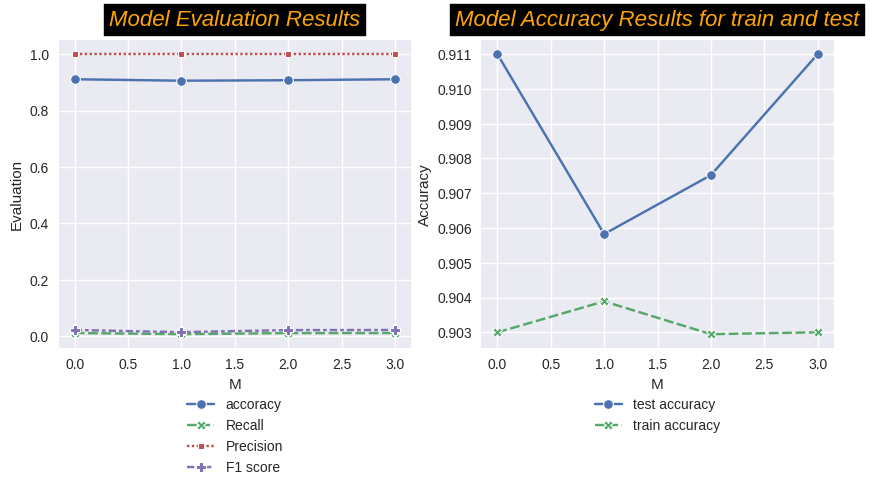

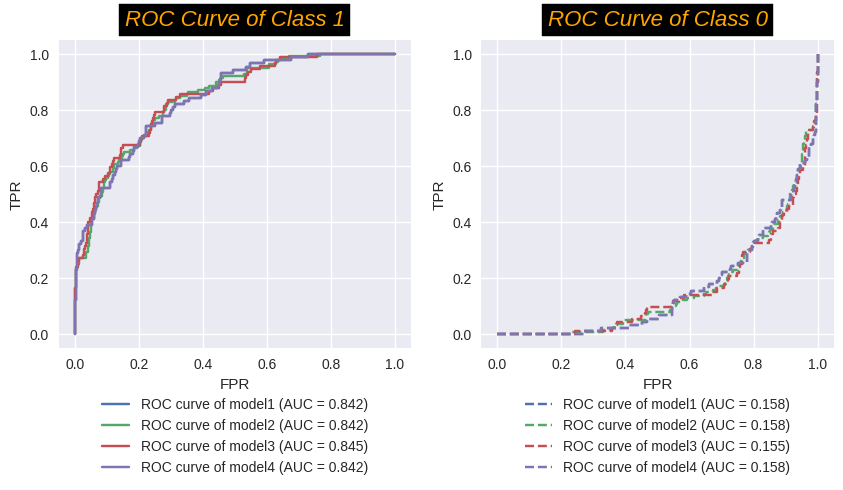

-------------------- Confusion Matrix --------------------
[[910   0]
 [ 89   1]]


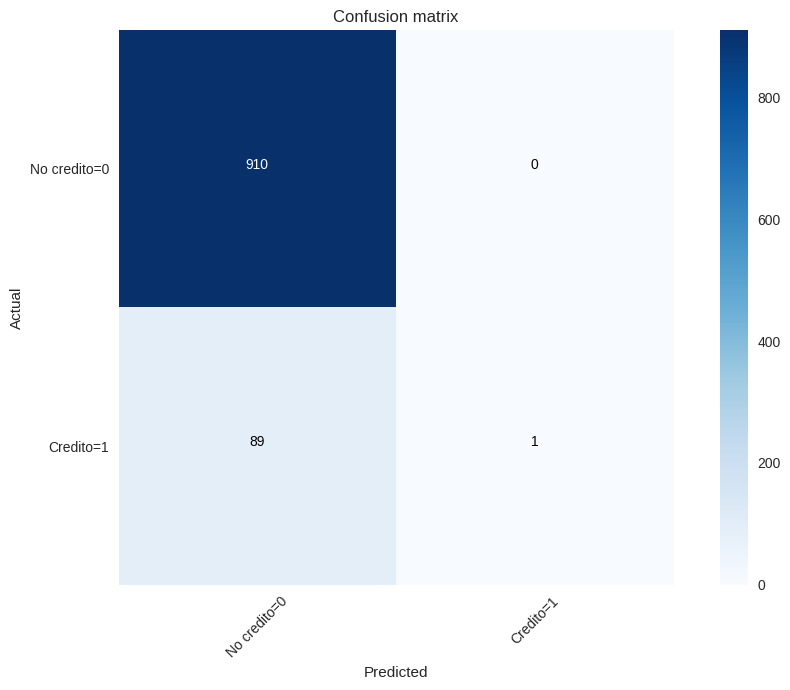

-------------------- Classification Report --------------------
              precision    recall  f1-score   support

No credito=0       0.91      1.00      0.95       910
   Credito=1       1.00      0.01      0.02        90

    accuracy                           0.91      1000
   macro avg       0.96      0.51      0.49      1000
weighted avg       0.92      0.91      0.87      1000
 

Jaccard Score: 0.011111111111111112 



In [40]:
# Now create first model
clf1, acc_test1, acc_train1 = modeling(x, y, 0.2, ['No credito=0', 'Credito=1'])

In [30]:
# delete 3 last results
del FPR1[1:]
del TPR1[1:]
del FPR0[1:]
del TPR0[1:]
del ACC_test[1:]
del ACC_train[1:]
del Recall[1:]
del Precision[1:]
del F1[1:]

In [31]:
Perform_cross_val(clf1, 10, x, y, scoring='accuracy')

-------------------- CV for k=10, scoring=accuracy --------------------
CV mean: 0.9046000000000001
CV results: [0.9   0.91  0.888 0.904 0.888 0.896 0.91  0.916 0.902 0.932]



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408

In [32]:
# first find index of datapoint in fold 1 and 3 by following func:
find_fold_index(10, x)

fold 1: [0,499]
--------------------
fold 2: [500,999]
--------------------
fold 3: [1000,1499]
--------------------
fold 4: [1500,1999]
--------------------
fold 5: [2000,2499]
--------------------
fold 6: [2500,2999]
--------------------
fold 7: [3000,3499]
--------------------
fold 8: [3500,3999]
--------------------
fold 9: [4000,4499]
--------------------
fold 10: [4500,4999]
--------------------


In [33]:
# delete above index from df2
df3 = df2.drop(df2.index[np.r_[200:239+1, 360:399+1]], axis=0)
print(f'df2:{df2.shape}')
print(f'df3:{df3.shape}')

df2:(5000, 11)
df3:(4920, 11)


In [34]:
# define new x and y
x2 = np.asanyarray(df3.drop('prestamopersonal', axis=1))
y2 = df3['prestamopersonal'].values.reshape(-1,1)

In [35]:
# Asumiendo que df2 contiene tus características y objetivo

# Aplica MinMaxScaler para escalar las características a un rango entre 0 y 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(df3.drop('prestamopersonal', axis=1))  # Changed df2 to df3

# Define x e y usando las características escaladas
x2 = np.asanyarray(x_scaled) # Changed x to x2
y2 = df3['prestamopersonal'].values.reshape(-1,1)

-------------------- Shape --------------------
x_train: (3444, 10)
y_train: (3444, 1)
x_test: (1476, 10)
y_test: (1476, 1)


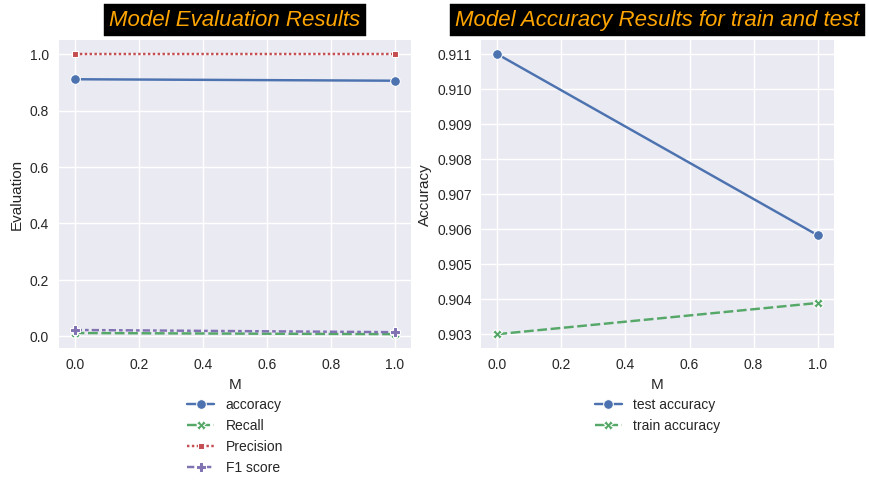

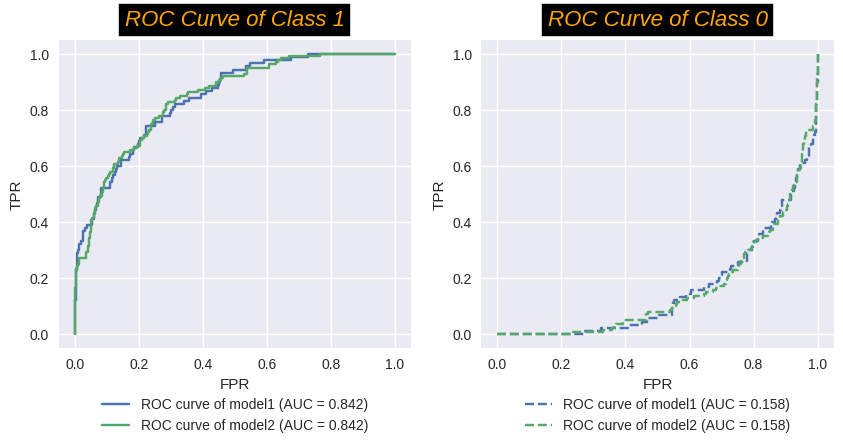

-------------------- Confusion Matrix --------------------
[[1336    0]
 [ 139    1]]


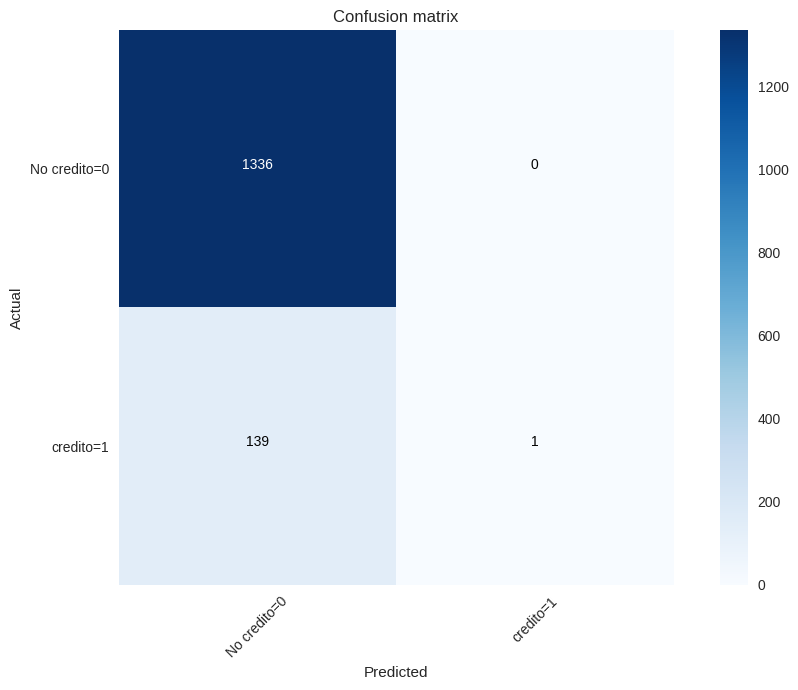

-------------------- Classification Report --------------------
              precision    recall  f1-score   support

No credito=0       0.91      1.00      0.95      1336
   credito=1       1.00      0.01      0.01       140

    accuracy                           0.91      1476
   macro avg       0.95      0.50      0.48      1476
weighted avg       0.91      0.91      0.86      1476
 

Jaccard Score: 0.007142857142857143 



In [36]:
lf2, acc_test2, acc_train2 = modeling(x2, y2, 0.3, classes=['No credito=0', 'credito=1'])

-------------------- Shape --------------------
x_train: (3936, 10)
y_train: (3936, 1)
x_test: (984, 10)
y_test: (984, 1)


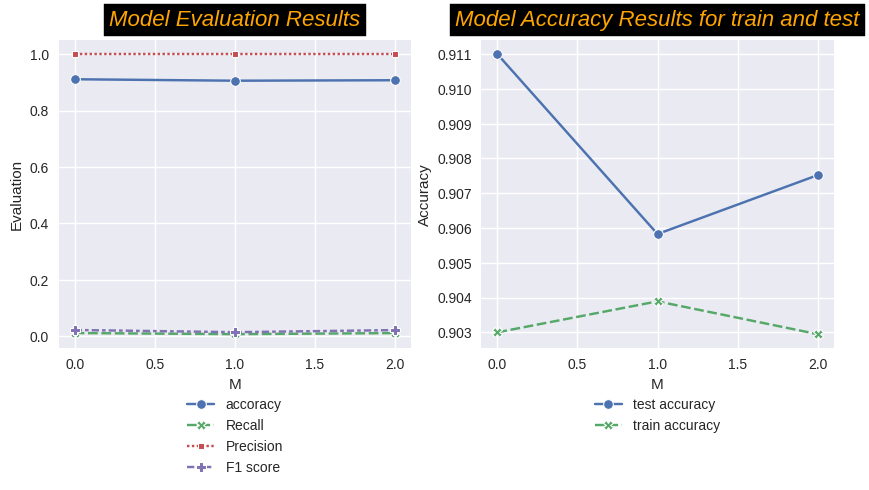

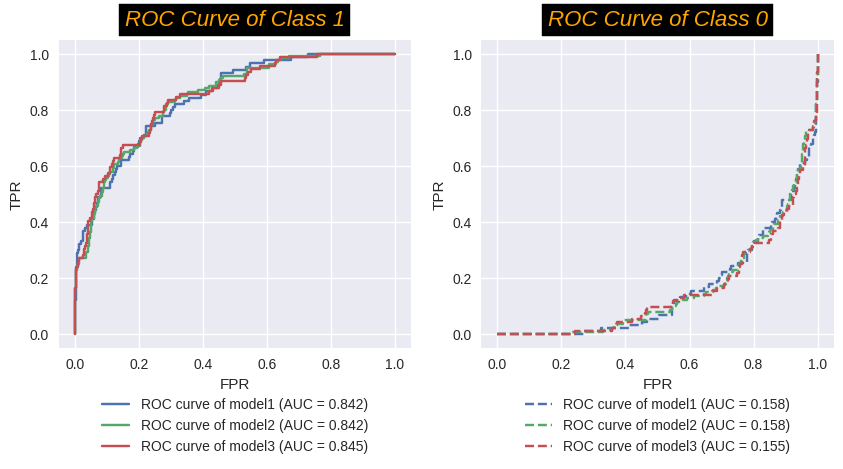

-------------------- Confusion Matrix --------------------
[[892   0]
 [ 91   1]]


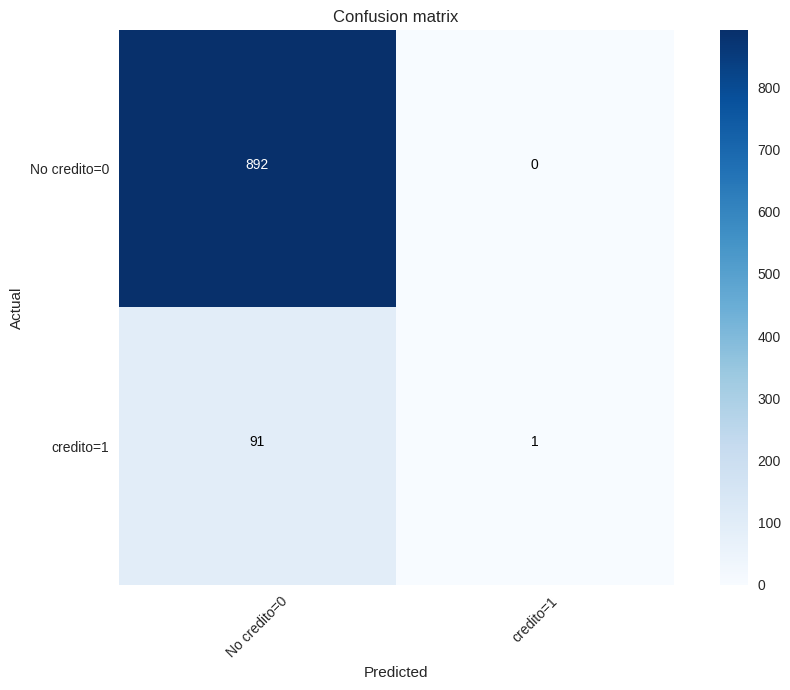

-------------------- Classification Report --------------------
              precision    recall  f1-score   support

No credito=0       0.91      1.00      0.95       892
   credito=1       1.00      0.01      0.02        92

    accuracy                           0.91       984
   macro avg       0.95      0.51      0.49       984
weighted avg       0.92      0.91      0.86       984
 

Jaccard Score: 0.010869565217391304 



In [37]:
# Now create first model
clf2, acc_test2, acc_train2 = modeling(x2, y2, 0.2, classes=['No credito=0', 'credito=1']) # Changed lf2 to clf2

## 7. vizualizacion final

In [38]:
%matplotlib inline
x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size=0.2, random_state=0)
x_test = np.concatenate((x_test, y_test), axis=1)
# Get the actual column names from df3
columns = list(df3.drop('prestamopersonal', axis=1).columns) + ['prestamopersonal']
x_test = pd.DataFrame(x_test, columns=columns) # Use actual columns

# Print the columns of x_test to verify if 'gasto card' exists
print(x_test.columns)

fig = px.scatter_3d(
    data_frame=x_test,
    x=x_test['CD Account'],  # Access columns using bracket notation
    y=x_test['Ingreso'],  # Access columns using bracket notation
    z=x_test['gasto cred'], # Assuming 'gasto cred' is the correct column name
    color=clf2.predict(x_test.drop('prestamopersonal', axis=1)).astype(str),
    color_discrete_sequence={0: 'red', 1: 'green'},
    template='ggplot2',
    opacity=0.6,
    height=700,
    title=f'Visualization Performance of clf2 in Predicting')

pio.show(fig)

Index(['Age', 'Experience', 'Ingreso', 'Family', 'gasto cred', 'Education',
       'hipoteca', 'Credit', 'CD Account', 'cuenta online',
       'prestamopersonal'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but MultinomialNB was fitted without feature names



## Predecir datos de muestra

In [39]:
# Ajustar el modelo final en todos los datos (entrenamiento + prueba)
final_model = MultinomialNB()
final_model.fit(x2, y2)

# Obtener todas las columnas utilizadas durante el entrenamiento (excluyendo el objetivo)
training_columns = df3.drop('prestamopersonal', axis=1).columns

# Crear nuevos datos de muestra con todas las columnas de entrenamiento
new_sample = pd.DataFrame({col: [0] for col in training_columns})  # Inicializar todo a 0
# Establecer valores para las características conocidas
new_sample['CD Account'] = [1]
new_sample['gasto cred'] = [1.0]
new_sample['Ingreso'] = [10]

print(f"CD Account: {new_sample['CD Account'].values[0]}\n"
      f"gasto cred: {new_sample['gasto cred'].values[0]}\n"
      f"Ingreso: {new_sample['Ingreso'].values[0]}")

# Estandarizar new_sample usando scaler
new_sample = pd.DataFrame(scaler.transform(new_sample), columns=training_columns)  # Usar training_columns aquí
ns = np.asanyarray(new_sample)

# Predecir nuevos datos de muestra
result = final_model.predict(ns)
print('='*38)
print(f"Prestamo personal {result}")

CD Account: 1
gasto cred: 1.0
Ingreso: 10
Prestamo personal [0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

